Found 30 entries for w_learning_rate = 0.005 in ER
Figure saved as /users-2/amine/pcax24/examples/experiments/ER_SHD_surface_plot.png


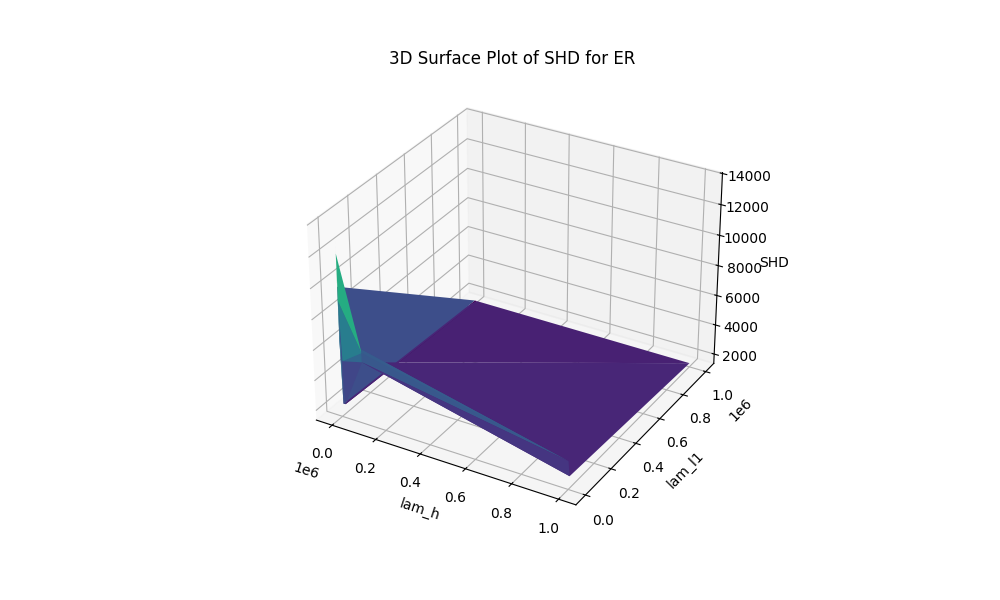

Found 15 entries for w_learning_rate = 0.005 in SF
Figure saved as /users-2/amine/pcax24/examples/experiments/SF_SHD_surface_plot.png


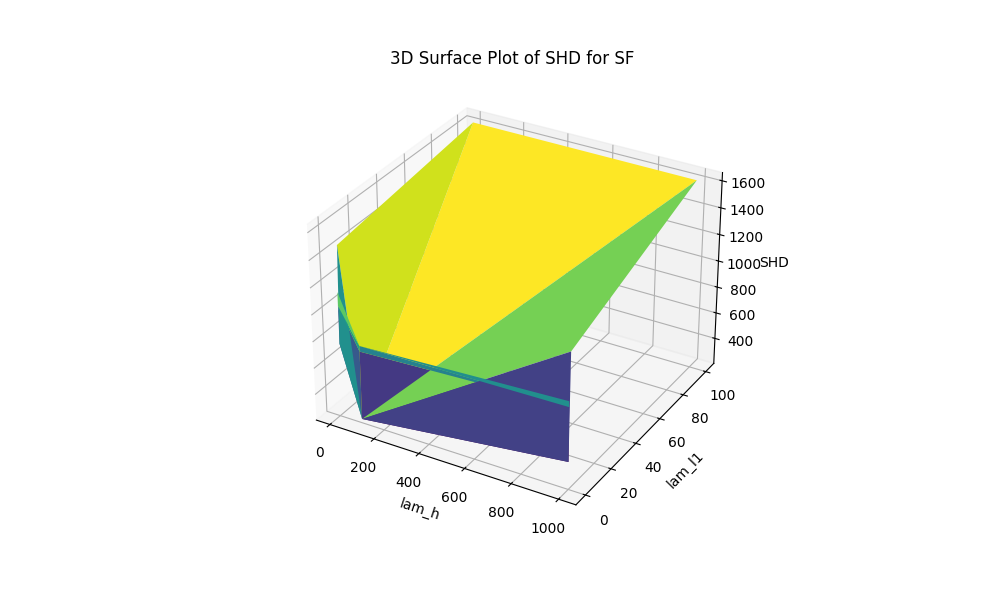

Found 24 entries for w_learning_rate = 0.005 in connectome
Figure saved as /users-2/amine/pcax24/examples/experiments/connectome_SHD_surface_plot.png


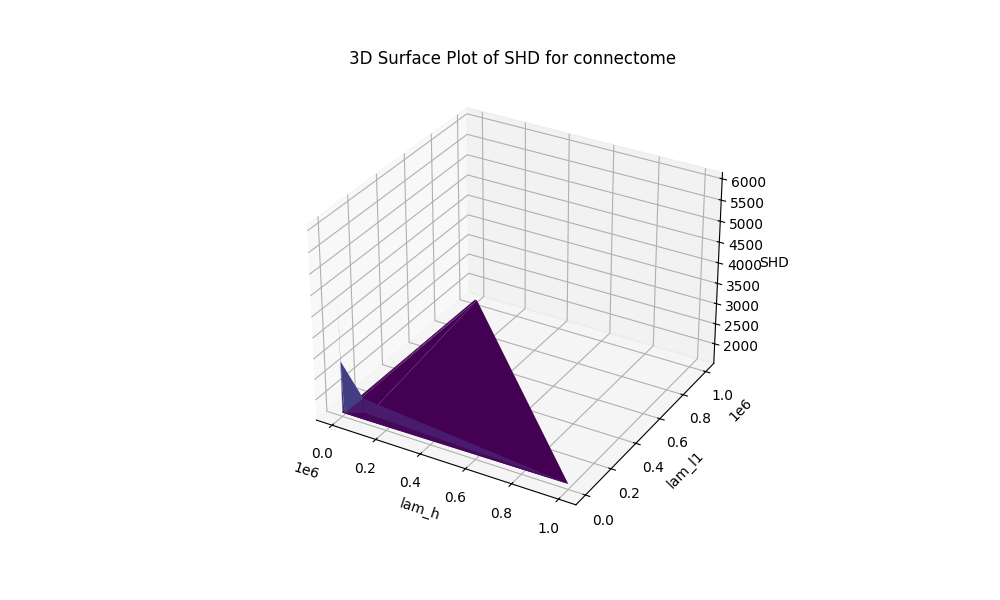

In [1]:
# Activate the interactive backend for Jupyter Notebooks
# Use %matplotlib widget for a more modern and reliable interactive experience
%matplotlib widget

import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import os

# Path to the experiments folder where CSV files are located
experiments_path = "/users-2/amine/pcax24/examples/experiments"

# List of CSV files corresponding to each graph type
csv_files = {
    "ER": os.path.join(experiments_path, "ER_experiments.csv"),
    "SF": os.path.join(experiments_path, "SF_experiments.csv"),
    "connectome": os.path.join(experiments_path, "connectome_experiments.csv")
}

# Iterate through each graph type and its corresponding CSV file
for graph_type, csv_file in csv_files.items():
    # Check if the CSV file exists
    if not os.path.exists(csv_file):
        print(f"CSV file for {graph_type} not found, skipping...")
        continue

    # Read the CSV file
    df = pd.read_csv(csv_file)

    # Filter rows where w_learning_rate is 0.005
    df_filtered = df[df['w_learning_rate'] == 0.005]


    # Print how many entries were found for w_learning_rate = 0.005 of the current graph type
    print(f"Found {len(df_filtered)} entries for w_learning_rate = 0.005 in {graph_type}")

    # Check if filtered DataFrame is not empty
    if df_filtered.empty:
        print(f"No data for w_learning_rate = 0.005 in {graph_type}, skipping...")
        continue

    # Drop rows with NaN or infinite values in relevant columns
    df_filtered = df_filtered.replace([np.inf, -np.inf], np.nan).dropna(subset=['lam_h', 'lam_l1', 'SHD'])

    # Check if the filtered DataFrame is still not empty after cleaning
    if df_filtered.empty:
        print(f"No valid data after cleaning in {graph_type}, skipping...")
        continue

    # Prepare data for plotting
    lam_h = df_filtered['lam_h'].values
    lam_l1 = df_filtered['lam_l1'].values
    SHD = df_filtered['SHD'].values

    # Create a new figure for each graph type
    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111, projection='3d')

    # Create a trisurface plot of SHD
    ax.plot_trisurf(lam_h, lam_l1, SHD, cmap='viridis', edgecolor='none')

    # Set labels and title
    ax.set_xlabel('lam_h')
    ax.set_ylabel('lam_l1')
    ax.set_zlabel('SHD')
    ax.set_title(f'3D Surface Plot of SHD for {graph_type}')

    # Save the figure
    save_path = os.path.join(experiments_path, f"{graph_type}_SHD_surface_plot.png")
    plt.savefig(save_path)
    print(f"Figure saved as {save_path}")

    # Show the plot interactively
    plt.show()
